In [41]:
import matplotlib.pyplot as plt

In [42]:
episode_length_list = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000]

lstm_total = {128:[], 256:[], 512:[]}
mate_total = {128:[], 256:[], 512:[]}

with open("./forward_time.txt", "r") as f:
    for line in f:
        if "Model:" in line and "Inference time:" in line:
            parts = line.split()
            

            try:
                model_name = parts[1]
                hidden_dim = int(parts[2])
                time_seconds = float(parts[-1])

                if model_name == "lstm":
                    if hidden_dim in lstm_total:
                        lstm_total[hidden_dim].append(time_seconds)
                elif model_name == "mate":
                    if hidden_dim in mate_total:
                        mate_total[hidden_dim].append(time_seconds)


                else:
                    raise ValueError
            except (ValueError, IndexError):
                continue



In [43]:
print(lstm_total)

{128: [0.12954714335501194, 0.07437590882182121, 0.07762519549578428, 0.07726254966109991, 0.0792068662121892, 0.08361574914306402, 0.08463930431753397, 0.08580406475812197, 0.08664191421121359, 0.12733856309205294, 0.08934447914361954, 0.09323045145720243, 0.10144146345555782, 0.10793768987059593, 0.10951502434909344, 0.11806843802332878, 0.1249202499166131, 0.13085288554430008, 0.1790503729134798, 0.1467760344967246], 256: [0.11510445084422827, 0.17240113578736782, 0.2931031510233879, 0.40883763786405325, 0.5205193255096674, 0.6395860696211457, 0.7580737229436636, 0.8775572022423148, 0.9821690786629915, 1.1000016331672668, 1.2141980435699224, 1.789987239986658, 2.374508864246309, 2.951869258657098, 3.5552550833672285, 4.144920729100704, 4.7042269594967365, 5.2915708385407925, 5.851411518640816, 7.024528304114938, 8.237086379900575], 512: [0.1677122600376606, 0.27942130621522665, 0.4991376893594861, 0.7340583894401789, 0.9651964167132974, 1.1962764067575336, 1.4152007726952434, 1.6564

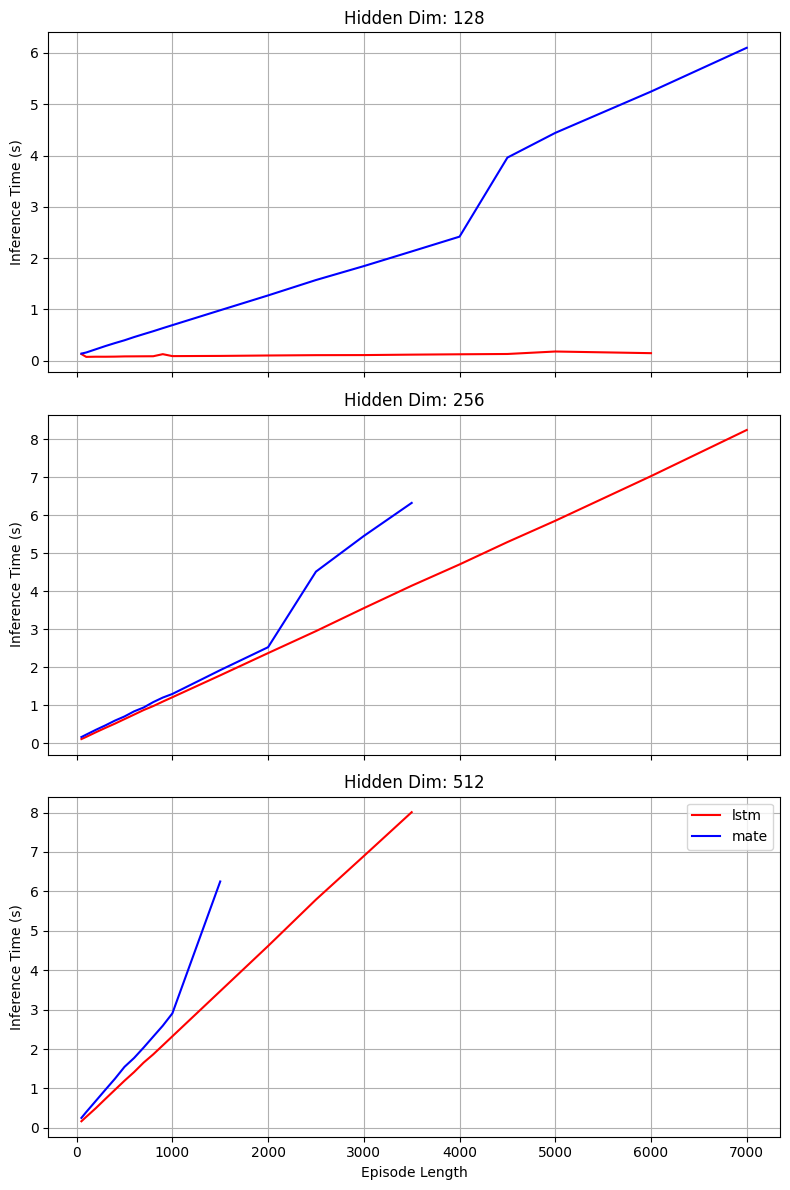

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
hidden_dims = [128, 256, 512]

for i, dim in enumerate(hidden_dims):
    if dim in lstm_total:
        y_values = lstm_total[dim]
        x_values = episode_length_list[:len(y_values)]

        axes[i].plot(x_values, y_values, 'r', label="lstm")
    if dim in mate_total:
        y_values = mate_total[dim]
        x_values = episode_length_list[:len(y_values)]
        axes[i].plot(x_values, y_values, 'b', label="mate")
    axes[i].set_title(f'Hidden Dim: {dim}')
    axes[i].set_ylabel('Inference Time (s)')
    axes[i].grid(True)

plt.xlabel('Episode Length')
#plt.title('Inference Time')
plt.tight_layout()
plt.legend()
plt.show()